In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift
import ipywidgets as widgets
from IPython.display import display, clear_output

def signal_filtering_demo(cutoff_freq=20, filter_type='low-pass', noise_level=0.3):
    """
    Interactive demo showing the effects of applying frequency filters to signals.
    
    Parameters:
    -----------
    cutoff_freq : float
        Frequency cutoff for the filter (Hz)
    filter_type : str
        Type of filter to apply ('low-pass', 'high-pass', or 'none')
    noise_level : float
        Level of random noise to add to the signal (0.0-1.0)
    """
    # Clear previous output
    clear_output(wait=True)
    
    # Create the figure
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
    # Time domain settings
    sampling_rate = 500  # Hz
    duration = 1.0       # seconds
    t = np.linspace(0, duration, int(sampling_rate * duration))
    
    # Generate a composite signal (3 frequencies + noise)
    freqs = [5, 15, 50]  # Hz
    amplitudes = [1.0, 0.5, 0.25]
    
    # Generate the clean signal
    clean_signal = np.zeros_like(t)
    for freq, amp in zip(freqs, amplitudes):
        clean_signal += amp * np.sin(2 * np.pi * freq * t)
    
    # Add noise
    noise = noise_level * np.random.randn(len(t))
    noisy_signal = clean_signal + noise
    
    # Compute FFT
    N = len(t)
    fft_signal = fft(noisy_signal)
    freqs = fftfreq(N, 1/sampling_rate)
    
    # Make frequencies and FFT values easier to plot
    pos_freqs = freqs[:N//2]
    pos_fft = np.abs(fft_signal[:N//2]) / N  # Normalize
    
    # Apply filter in frequency domain
    filtered_fft = fft_signal.copy()
    
    if filter_type == 'low-pass':
        filtered_fft[np.abs(freqs) > cutoff_freq] = 0
    elif filter_type == 'high-pass':
        filtered_fft[np.abs(freqs) < cutoff_freq] = 0
    # 'none' case: no filtering applied
    
    # Convert back to time domain
    filtered_signal = ifft(filtered_fft).real
    
    # Make filtered FFT values easier to plot
    pos_filtered_fft = np.abs(filtered_fft[:N//2]) / N  # Normalize
    
    # Plot original signal in time domain
    axes[0, 0].plot(t, noisy_signal)
    axes[0, 0].set_title('Original Signal (Time Domain)')
    axes[0, 0].set_xlabel('Time (s)')
    axes[0, 0].set_ylabel('Amplitude')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot original signal in frequency domain
    axes[0, 1].plot(pos_freqs, pos_fft)
    axes[0, 1].set_title('Original Signal (Frequency Domain)')
    axes[0, 1].set_xlabel('Frequency (Hz)')
    axes[0, 1].set_ylabel('Magnitude')
    axes[0, 1].set_xlim(0, sampling_rate/4)  # Show only first quarter of frequencies
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot filtered signal in frequency domain
    axes[1, 1].plot(pos_freqs, pos_filtered_fft)
    axes[1, 1].set_title(f'Filtered Signal ({filter_type}, cutoff={cutoff_freq:.2f} Hz)')
    axes[1, 1].set_xlabel('Frequency (Hz)')
    axes[1, 1].set_ylabel('Magnitude')
    axes[1, 1].set_xlim(0, sampling_rate/4)  # Show only first quarter of frequencies
    axes[1, 1].grid(True, alpha=0.3)
    
    # Highlight filtered regions
    if filter_type == 'low-pass':
        axes[1, 1].axvspan(cutoff_freq, sampling_rate/4, alpha=0.2, color='red')
    elif filter_type == 'high-pass':
        axes[1, 1].axvspan(0, cutoff_freq, alpha=0.2, color='red')
    
    # Plot filtered signal in time domain
    axes[1, 0].plot(t, filtered_signal)
    axes[1, 0].set_title('Filtered Signal (Time Domain)')
    axes[1, 0].set_xlabel('Time (s)')
    axes[1, 0].set_ylabel('Amplitude')
    axes[1, 0].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Create interactive widgets
filter_type_dropdown = widgets.Dropdown(
    options=['low-pass', 'high-pass', 'none'],
    value='low-pass',
    description='Filter:',
)

cutoff_slider = widgets.FloatSlider(
    min=1,
    max=100,
    step=1,
    value=20,
    description='Cutoff (Hz):',
)

noise_slider = widgets.FloatSlider(
    min=0,
    max=1,
    step=0.1,
    value=0.3,
    description='Noise:',
)

# Create interactive output
widgets.interact(
    signal_filtering_demo,
    cutoff_freq=cutoff_slider,
    filter_type=filter_type_dropdown,
    noise_level=noise_slider
)

# Explanatory text (outside the function)
explanation = """
### What's happening here?

1. **Original Signal**: A combination of sine waves at 5 Hz, 15 Hz, and 50 Hz with added noise

2. **Fourier Transform**: Converts the time domain signal into frequency domain

3. **Frequency Filtering**: 
   - Low-pass: Removes frequencies above the cutoff
   - High-pass: Removes frequencies below the cutoff

4. **Inverse Fourier Transform**: Converts the filtered frequency data back to time domain

Try adjusting the cutoff frequency and filter type to see how they affect signal reconstruction!
"""
print(explanation)

interactive(children=(FloatSlider(value=20.0, description='Cutoff (Hz):', min=1.0, step=1.0), Dropdown(descrip…


### What's happening here?

1. **Original Signal**: A combination of sine waves at 5 Hz, 15 Hz, and 50 Hz with added noise

2. **Fourier Transform**: Converts the time domain signal into frequency domain

3. **Frequency Filtering**: 
   - Low-pass: Removes frequencies above the cutoff
   - High-pass: Removes frequencies below the cutoff

4. **Inverse Fourier Transform**: Converts the filtered frequency data back to time domain

Try adjusting the cutoff frequency and filter type to see how they affect signal reconstruction!



this is great, but only the top four subplots are necessary.
also, the explanatory text is good and I'll use something like that, but let's not have it inside the function.

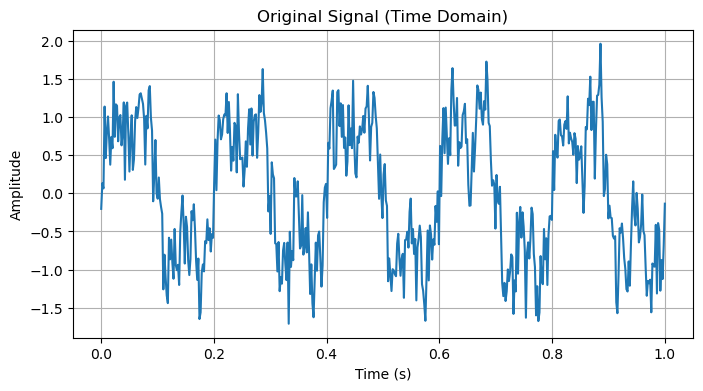

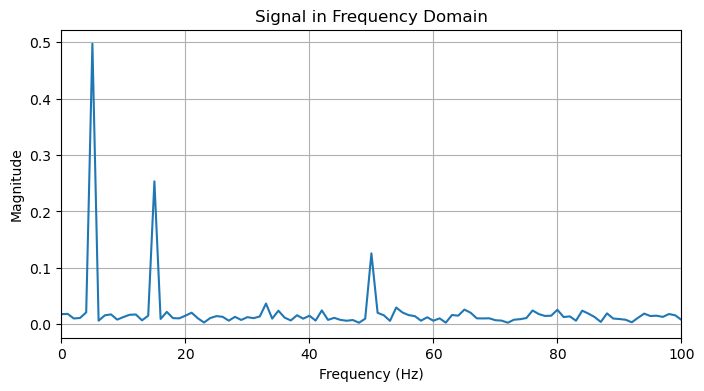

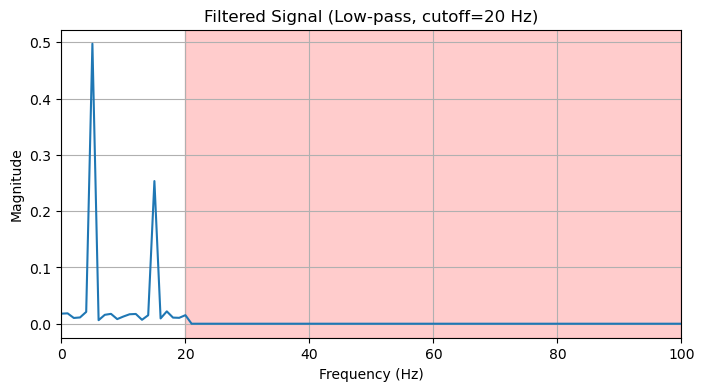

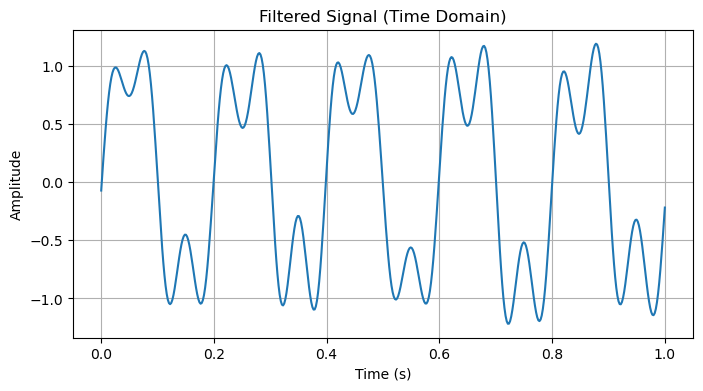

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

